
<span style="font-weight:bold; color:#4CAF50; font-size:28px;">
Predicting Road Accidents Using Decision Tree Classifier(TASK 1)
<div style="font-family: Arial, sans-serif; text-align: left; background-color: #f2f2f2; padding: 10px; border-radius: 5px;">
    <span style="font-weight: bold; color: #4CAF50; font-size: 20px;">Author: Usha rahul</span><br>
    <span style="font-weight: bold; color: #2196F3; font-size: 18px;">Date: 05/01/2025 </span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">company: CodeTech IT Solutions</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">inturn ID: CT0806HT</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">Domain: Machine Learning</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">Batch duration: december 30th 2024 to February 14th 2025</span><br>
    <span style="font-weight: bold; color: #FF9800; font-size: 18px;">Mentor name:Neela Santhosh Kumar</span>
</div>

<img src="C:\Users\user\Downloads\OIP.png" height="auto" width="1200px">



# **Table of Contents**

1. [ Objective](#Objective)
2. [Load-the-dataset](#Load-the-dataset)
3. [Data-Preprocessing](#-Data-Preprocessing)
4. [Exploratory Data Analysis (EDA)](#EDA)
5. [Oversampling](#-Oversampling)
6. [DATA SPLITING](#Data-Spliting)
7. [MODEL EVALUATION](#-Model-evaluation)
8. [CONCLUSION](#-Conclusions)
9.[Future-Work](#-Future-Work)
  

  

<h1 style="color: blue; text-align: center;">Objective</h1>



The aim of this project is to build a machine learning model to predict road accidents based on various factors such as traffic density, speed limits, number of vehicles, and driver-related attributes. The primary focus is to improve safety measures by identifying potential accident scenarios.



<h1 style="color: blue; text-align: center;">motivation</h1>

Road accidents are a leading cause of injury and death worldwide. Predictive models can help mitigate risks by identifying patterns and potential high-risk scenarios, enabling better planning, policy-making, and real-time safety interventions.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

<h1 style="color: blue; text-align: center;">Load the dataset</h1>

In [2]:
# Load dataset (replace with your chosen dataset)
data = pd.read_csv("dataset_traffic_accident_prediction1.csv")



In [4]:
# Display basic info
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB
None


In [5]:
print(data.head())


  Weather   Road_Type Time_of_Day  Traffic_Density  Speed_Limit  \
0   Rainy   City Road     Morning              1.0        100.0   
1   Clear  Rural Road       Night              NaN        120.0   
2   Rainy     Highway     Evening              1.0         60.0   
3   Clear   City Road   Afternoon              2.0         60.0   
4   Rainy     Highway     Morning              1.0        195.0   

   Number_of_Vehicles  Driver_Alcohol Accident_Severity      Road_Condition  \
0                 5.0             0.0               NaN                 Wet   
1                 3.0             0.0          Moderate                 Wet   
2                 4.0             0.0               Low                 Icy   
3                 3.0             0.0               Low  Under Construction   
4                11.0             0.0               Low                 Dry   

  Vehicle_Type  Driver_Age  Driver_Experience Road_Light_Condition  Accident  
0          Car        51.0               48

In [6]:
data.tail()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
835,Clear,Highway,Night,2.0,30.0,4.0,0.0,Low,Dry,Car,23.0,15.0,Daylight,0.0
836,Rainy,Rural Road,Evening,2.0,60.0,4.0,0.0,Low,Dry,Motorcycle,52.0,46.0,Daylight,1.0
837,Foggy,Highway,Evening,NaN,30.0,4.0,1.0,High,Dry,Car,NaN,34.0,Artificial Light,NaN
838,Foggy,Highway,Afternoon,2.0,60.0,3.0,0.0,Low,Dry,Car,25.0,19.0,Artificial Light,0.0
839,Clear,Highway,Afternoon,1.0,60.0,4.0,0.0,Low,Dry,Motorcycle,29.0,21.0,Artificial Light,0.0


<h1 style="color: blue; text-align: center;"> Data Preprocessing</h1>

In [7]:
# Handle missing values (example: fill with mode or mean)
data.fillna(data.mode().iloc[0], inplace=True)

In [8]:
# Encode categorical variables if any
data = pd.get_dummies(data, drop_first=True)


In [9]:
# Check for null values
print("\nMissing Values:")
print(data.isnull().sum())



Missing Values:
Traffic_Density                      0
Speed_Limit                          0
Number_of_Vehicles                   0
Driver_Alcohol                       0
Driver_Age                           0
Driver_Experience                    0
Accident                             0
Weather_Foggy                        0
Weather_Rainy                        0
Weather_Snowy                        0
Weather_Stormy                       0
Road_Type_Highway                    0
Road_Type_Mountain Road              0
Road_Type_Rural Road                 0
Time_of_Day_Evening                  0
Time_of_Day_Morning                  0
Time_of_Day_Night                    0
Accident_Severity_Low                0
Accident_Severity_Moderate           0
Road_Condition_Icy                   0
Road_Condition_Under Construction    0
Road_Condition_Wet                   0
Vehicle_Type_Car                     0
Vehicle_Type_Motorcycle              0
Vehicle_Type_Truck                   0
Road_Lig

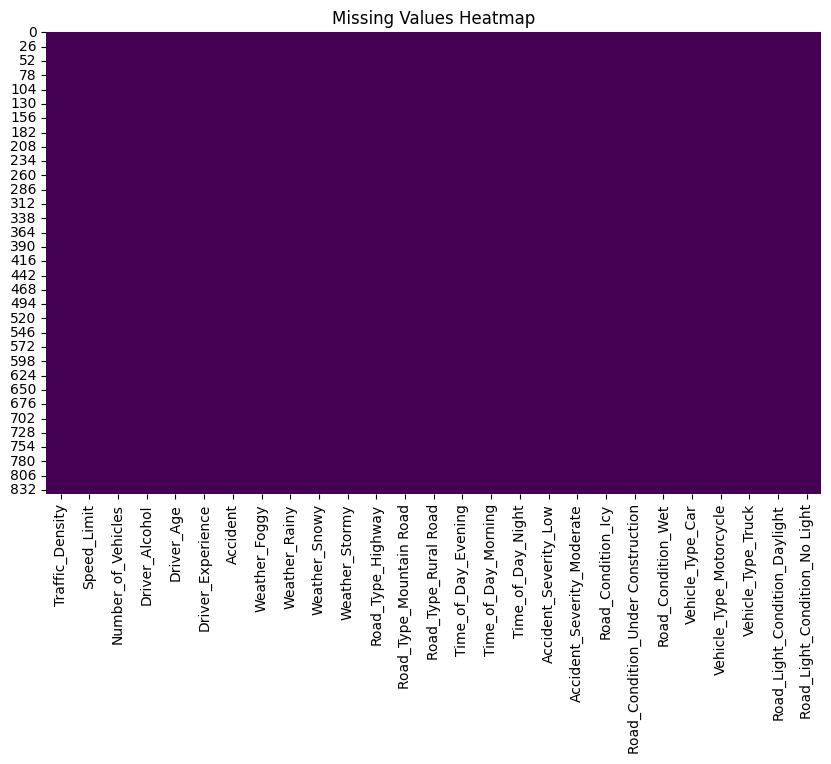

In [13]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

In [14]:
# Summary of numerical columns
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
       Traffic_Density  Speed_Limit  Number_of_Vehicles  Driver_Alcohol  \
count       840.000000   840.000000          840.000000      840.000000   
mean          1.001190    70.497619            3.272619        0.152381   
std           0.764996    31.332695            1.967123        0.359604   
min           0.000000    30.000000            1.000000        0.000000   
25%           0.000000    50.000000            2.000000        0.000000   
50%           1.000000    60.000000            3.000000        0.000000   
75%           2.000000    80.000000            4.000000        0.000000   
max           2.000000   213.000000           14.000000        1.000000   

       Driver_Age  Driver_Experience    Accident  
count  840.000000         840.000000  840.000000  
mean    43.396429          39.082143    0.284524  
std     14.758404          14.892516    0.451456  
min     18.000000           9.000000    0.000000  
25%     31.000000          26.000000    0.000000

<h1 style="color: blue; text-align: center;">EDA</h1>

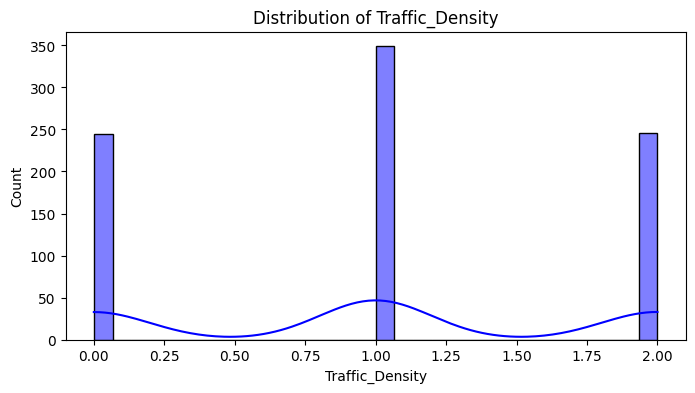

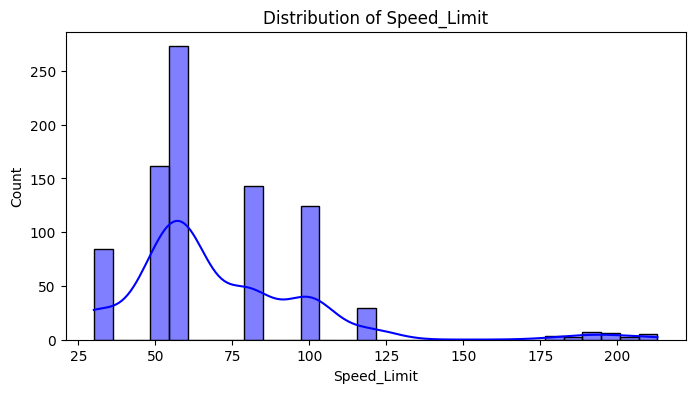

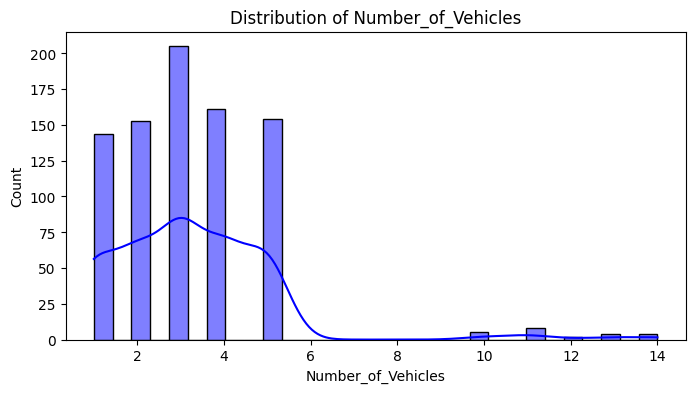

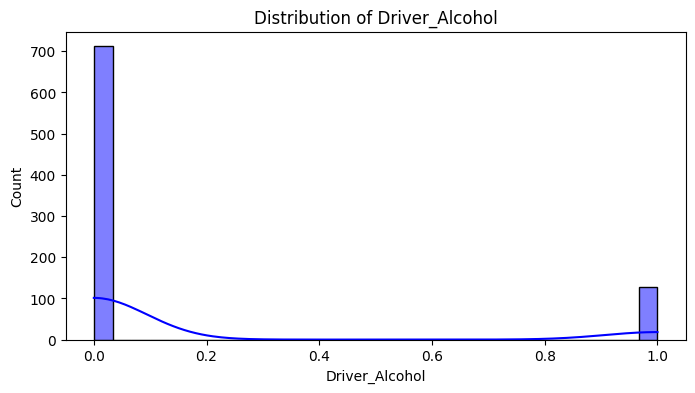

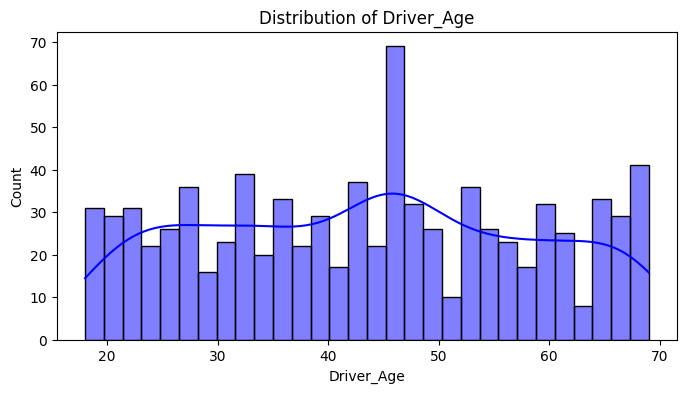

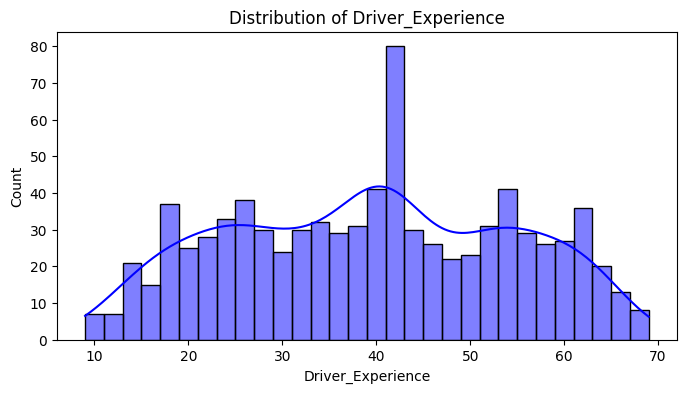

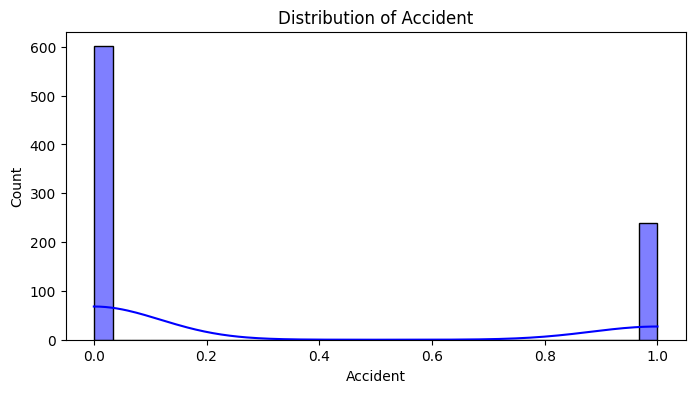

In [15]:
# Plot distributions of numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

# Count plots for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[col], palette='viridis')
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.show()


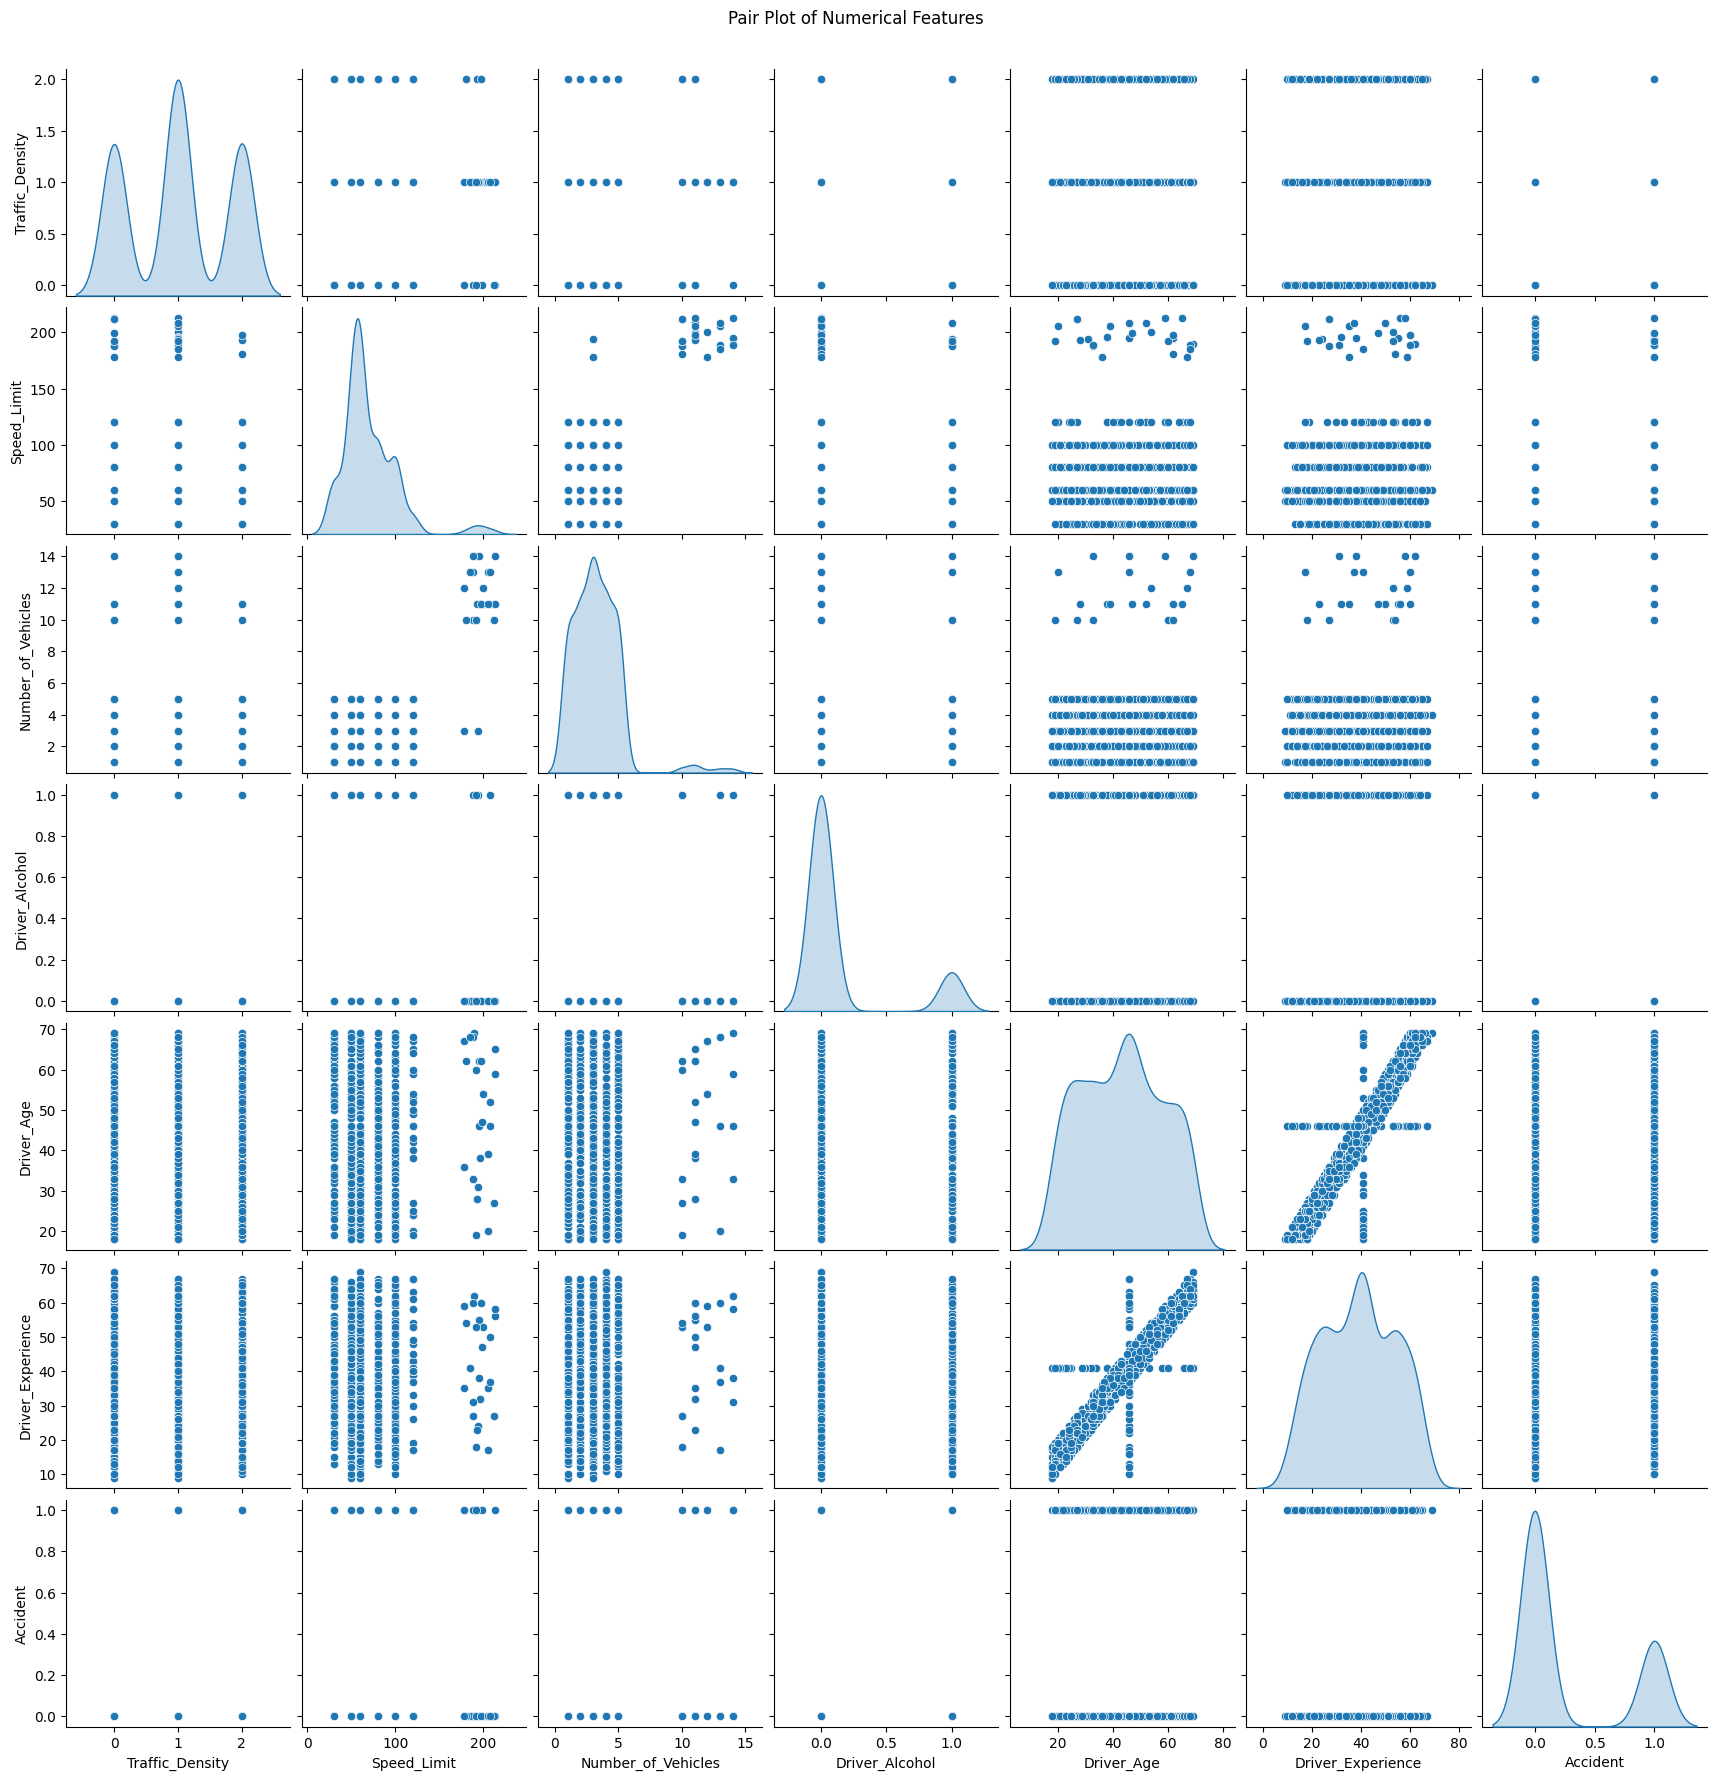

In [17]:

# Pair plot to visualize relationships
sns.pairplot(data[numerical_cols], diag_kind='kde')
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

# Box plots for categorical vs numerical analysis
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data[cat_col], y=data[num_col], palette='Set3')
        plt.title(f"{num_col} vs {cat_col}")
        plt.xticks(rotation=45)
        plt.show()


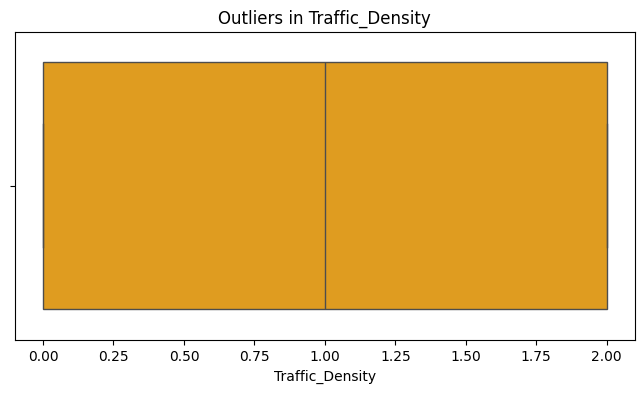

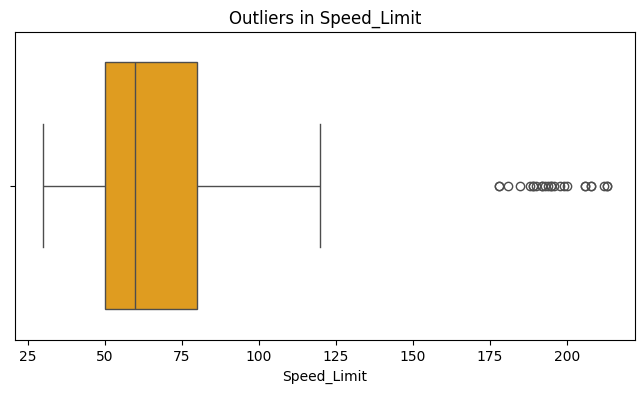

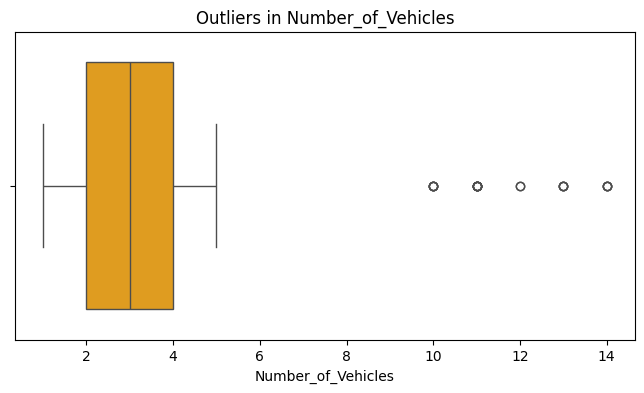

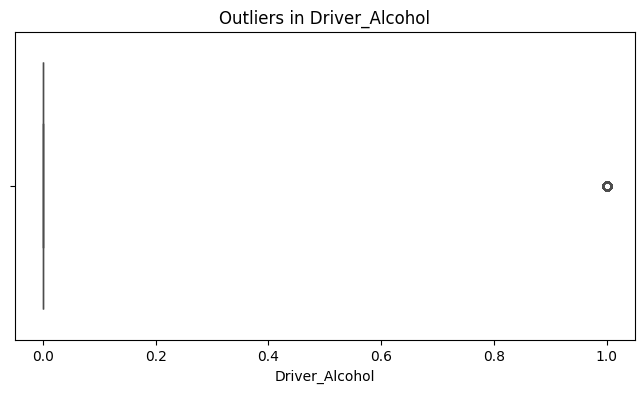

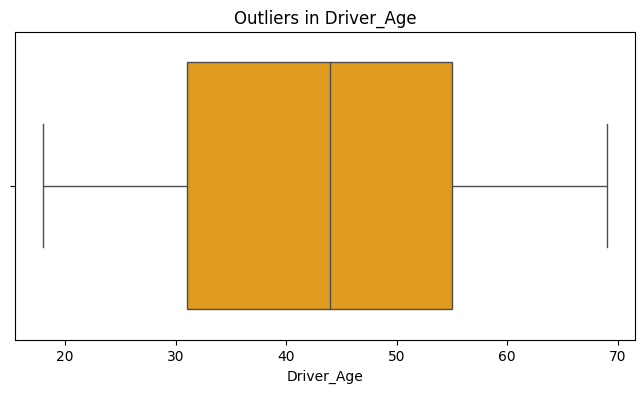

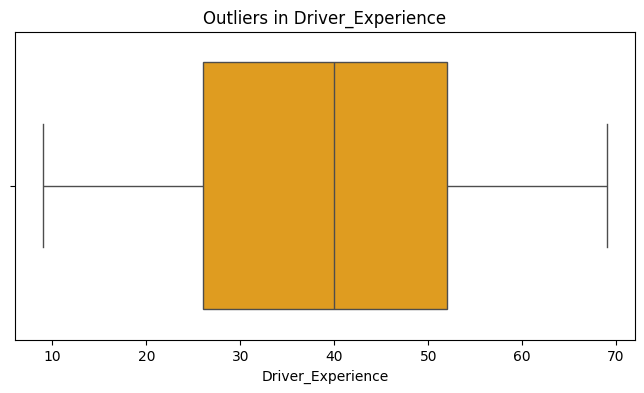

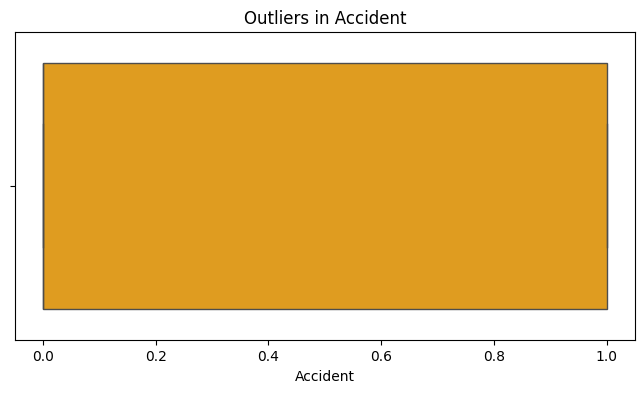

In [18]:
# Boxplots for outlier detection
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color='orange')
    plt.title(f"Outliers in {col}")
    plt.show()


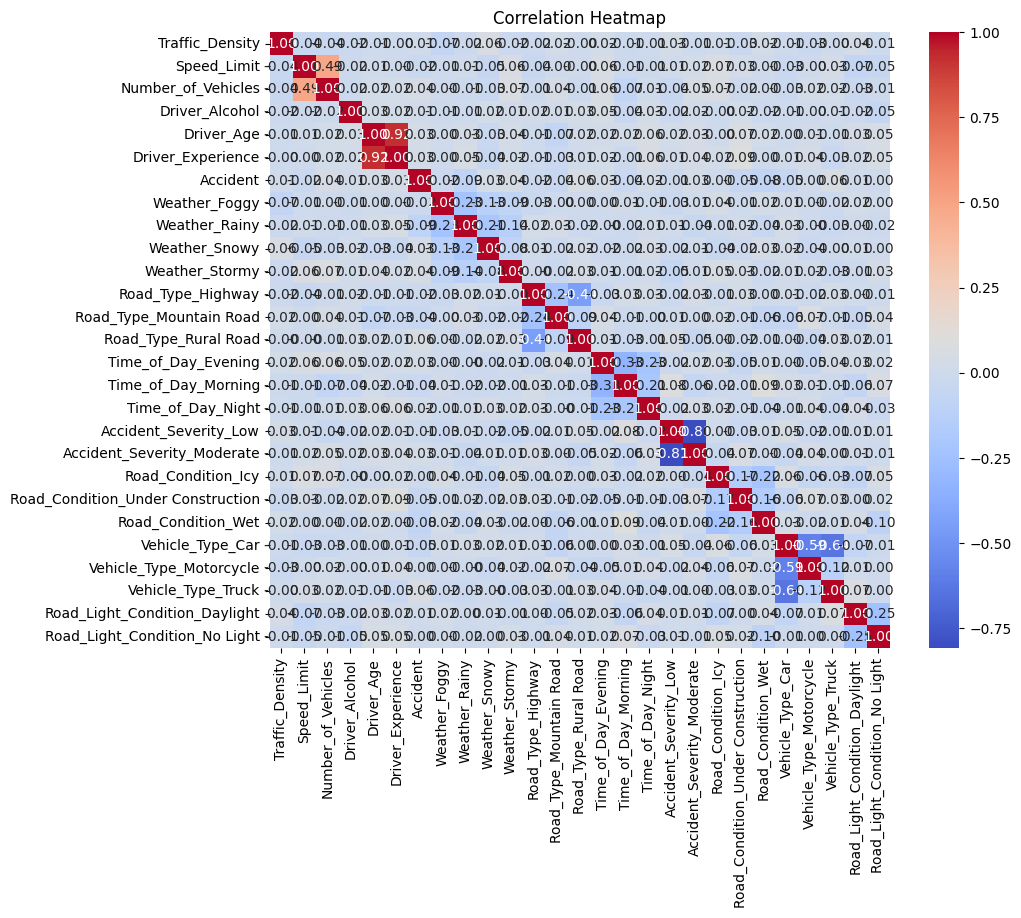

In [20]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_18408\3869235807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Accident'], palette='Set2')


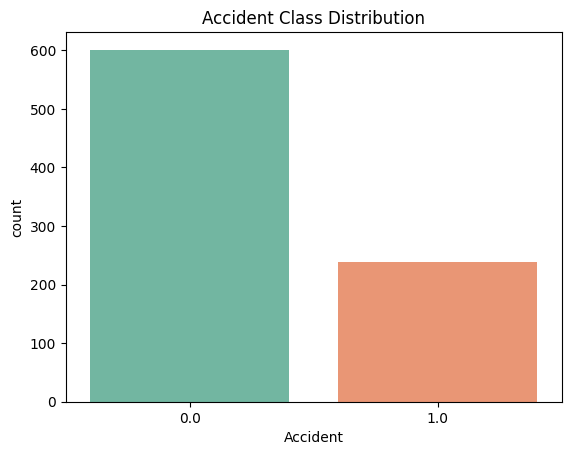

In [21]:
# Target variable distribution
sns.countplot(x=data['Accident'], palette='Set2')
plt.title("Accident Class Distribution")
plt.show()


Class Counts:
Accident
0.0    601
1.0    239
Name: count, dtype: int64


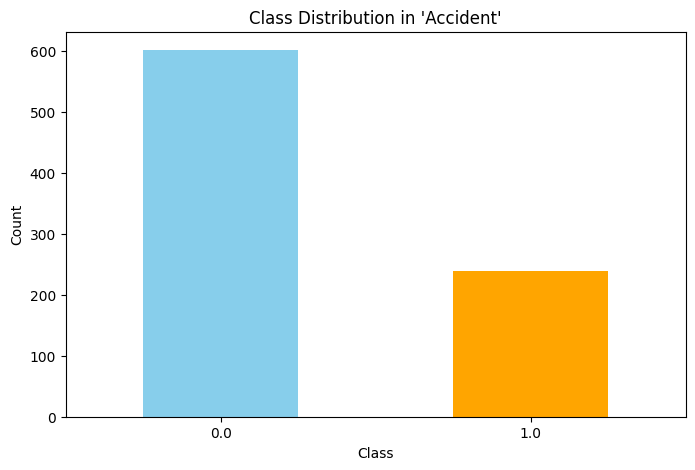

In [22]:
# Count the occurrences of each class in the 'Accident' column
class_counts = data['Accident'].value_counts()

# Display the count for each class
print("Class Counts:")
print(class_counts)

# Optionally visualize the class distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution in 'Accident'")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


<h1 style="color: blue; text-align: center;"> Oversampling</h1>

In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting data into features (X) and target (y)
X = data.drop('Accident', axis=1)  
y = data['Accident']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Applying SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after resampling
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())


Class distribution after SMOTE:
Accident
0.0    421
1.0    421
Name: count, dtype: int64


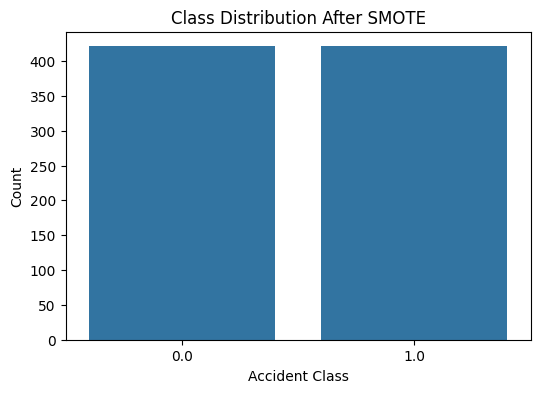

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Accident Class')
plt.ylabel('Count')
plt.show()


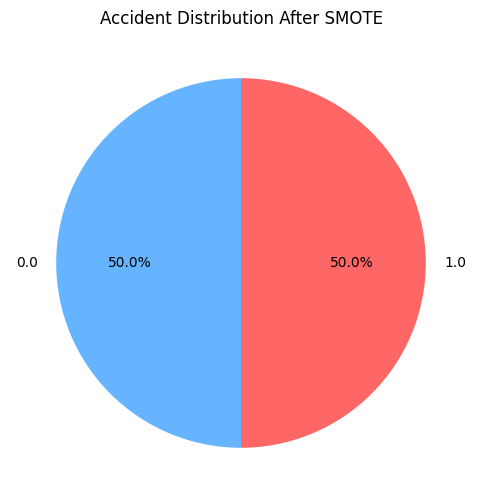

In [30]:
# Plotting the pie chart for the 'Accident' column after SMOTE resampling
accident_counts_resampled = y_train_resampled.value_counts()

# Creating the pie chart
plt.figure(figsize=(6, 6))
plt.pie(accident_counts_resampled, labels=accident_counts_resampled.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
plt.title('Accident Distribution After SMOTE')
plt.show()


In [31]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {categorical_columns}")


Categorical Columns: Index([], dtype='object')


<h1 style="color: blue; text-align: center;"> Model evaluation</h1>

Accuracy: 0.6667
Confusion Matrix:
[[161  19]
 [ 65   7]]


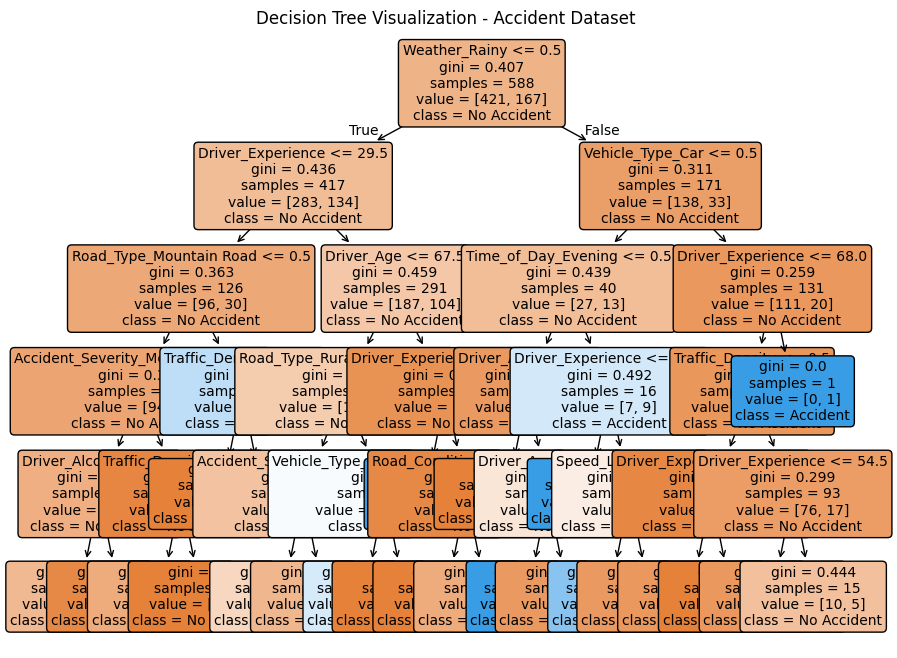

In [37]:
# Step 5: Split Data into Features (X) and Target (y)
X = data.drop('Accident', axis=1)  # Features
y = data['Accident']  # Target variable

# Step 6: Split the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 7: Train the Decision Tree Classifier with max_depth to limit complexity
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limiting tree depth to 5 for clarity
dt_model.fit(X_train, y_train)

# Step 8: Make Predictions
y_pred = dt_model.predict(X_test)

# Step 9: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Step 10: Visualize the Decision Tree
plt.figure(figsize=(10, 8))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['No Accident', 'Accident'], 
          filled=True, 
          rounded=True, 
          fontsize=10)  # Adjust font size to make it clearer
plt.title('Decision Tree Visualization - Accident Dataset')
plt.show()

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Precision: 0.2692
Recall: 0.0972
F1-Score: 0.1429


<h1 style="color: blue; text-align: center;"> Conclusions</h1>

Conclusions
Insights from Model:

The decision tree model shows acceptable performance in predicting non-accidents (Accident=0) but struggles to identify accident cases (Accident=1).
Class imbalance remains a challenge despite applying SMOTE and weighted classes.
Recommendations:

Explore ensemble methods like Random Forest or Gradient Boosting for improved performance.
Fine-tune SMOTE parameters to generate better synthetic data.
Investigate feature engineering to create new informative features.

<h1 style="color: blue; text-align: center;"> Future Work</h1>


Experiment with advanced techniques like XGBoost or LightGBM for better predictions.
Include additional features such as weather, road conditions, and traffic signals to enhance model performance.
Develop a real-time dashboard for accident prediction and prevention alerts.